In [0]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

#REGRESSION MODEL NOTES
## We Can Conduct a few different version of this regression model by changing the dependent and independent variables
**Dependent Variable**
We can elect to make the dependent variable round score or tournament score

*Round Score* - would give us more data points, but could also cause higher variation

*Tournament Score* - would seem to be the better fit, but we may not have enough data points

The dependent variable can also refer to tournament score across all tournaments, or for a specific tournament

**Independent Variables**

4 major groups of Independent Variables

*Greens In Regulation* : Describes how frequently the player makes in to the green at least 2 strokes away from par based on a number of situation. Evaluates a players skill in the fairways/middle game

    Consists of ['GIR_PCT_FAIRWAY_BUNKER', 'GIR_PCT_FAIRWAY', 'GIR_PCT_OVERALL', 'GIR_PCT_OVER_100', 'GIR_PCT_OVER_200','GIR_PCT_UNDER_100', 'GREEN_PCT_SCRAMBLE_SAND', 'GREEN_PCT_SCRAMBLE_ROUGH']
     
*Tee Box*: Describes different elements of a players driving/tee shots. Evaluates a players skill off the tee/long game

    Consists of ['TEE_AVG_BALL_SPEED', 'TEE_AVG_DRIVING_DISTANCE', 'TEE_DRIVING_ACCURACY_PCT', 'TEE_AVG_LAUNCH_ANGLE', 'TEE_AVG_LEFT_ROUGH_TENDENCY_PCT', 'TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT', 'TEE_AVG_SPIN_RATE']
    
*Putting*: Describes a players performance on the green. Evaluates a players putting skill/short game

    Consists of ['PUTTING_AVG_ONE_PUTTS', 'PUTTING_AVG_TWO_PUTTS','PUTTING_AVG_PUTTS','PUTTING_AVG_DIST_BIRDIE_INCH']
    
*Performance Based*: Descibes a players performance in terms of previous results and scores. Evaluates a players consistency and past performances

    Consists of ['Par3Average','Par4Average', 'Par5Average', 'HolesPerBirdie', 'HolesPerBogey','FINISHES_TOP10']
    
**Independence Between Variables**

To avoid creating bias in the regression model, we should avoid using the following highly coorelated independent variables together in the same model

*GIR*: (GIR_PCT_OVERALL: GIR_PCT_OVER_100, GIR_PCT_FAIRWAY)

*Tee*: (TEE_AVG_BALL_SPEED: TEE_AVG_DRIVING_DISTANCE)

*Putting*: (PUTTING_AVG_ONE_PUTTS: PUTTING_AVG_TWO_PUTTS : PUTTING_AVG_PUTTS)

*Performance Based*: (Par4Average: HolesPerBogey)

In [0]:
# Lets Start with the Dependent Variable as Round Score across all tournaments

roundsDf = pd.read_csv("/dbfs/FileStore/karbide/RoundsReg.txt")

playerStats = pd.read_csv("/dbfs/FileStore/karbide/PlayerStatsComplete.txt")

roundsDf.drop(["Unnamed: 0"], axis = 1, inplace = True)
playerStats.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [0]:
roundScores = roundsDf[["PlayerID","RoundScore"]]

In [0]:
roundsReg = roundScores.merge(playerStats, how = "left", on = "PlayerID")

In [0]:
roundsReg.corr()
# none or the variables are highly coorelated with RoundScore but the performance based ones score the highest

,PlayerID,RoundScore,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey
PlayerID,1.000000,0.002774,-0.065696,0.051964,0.095399,0.108098,0.094246,0.026665,-0.053826,-0.085705,-0.021593,0.141638,0.097855,0.012234,-0.089560,0.065483,-0.094608,-0.026777,-0.068997,0.026541,0.099340,0.022469,0.050825,0.026052,-0.052893,-0.052719,-0.029408
RoundScore,0.002774,1.000000,-0.028051,-0.077392,-0.084546,-0.071404,-0.037793,-0.043016,-0.053475,-0.038015,-0.092769,-0.019293,-0.032981,-0.025258,0.009788,0.013475,0.024442,-0.007358,-0.026241,0.007501,0.030031,0.026538,0.142849,0.187806,0.158920,0.169039,-0.170452
GIR_PCT_FAIRWAY_BUNKER,-0.065696,-0.028051,1.000000,0.096978,0.184974,0.178879,0.034710,0.053877,0.011217,0.020193,0.046012,0.065174,0.082225,-0.109379,-0.064664,0.048578,0.082321,0.030013,-0.144880,0.204964,0.142744,-0.003753,-0.148258,-0.093888,-0.114661,-0.085707,0.134550
GIR_PCT_FAIRWAY,0.051964,-0.077392,0.096978,1.000000,0.736838,0.613519,0.354268,0.352758,0.062239,0.008699,0.214172,0.385018,0.446655,-0.091023,-0.134707,0.119344,-0.002421,0.044117,-0.309804,0.310879,0.318267,-0.134474,-0.275808,-0.326263,-0.281871,-0.299927,0.310909
GIR_PCT_OVERALL,0.095399,-0.084546,0.184974,0.736838,1.000000,0.920176,0.556177,0.459369,0.020102,0.023285,0.121831,0.121440,0.179268,0.340531,-0.114769,-0.164235,-0.275957,0.020563,-0.535341,0.542172,0.521537,-0.068010,-0.349788,-0.422000,-0.170866,-0.252740,0.397119
GIR_PCT_OVER_100,0.108098,-0.071404,0.178879,0.613519,0.920176,1.000000,0.606561,0.400131,0.059966,0.039893,0.050242,0.025028,0.064247,0.349959,-0.098920,-0.185516,-0.283561,0.009435,-0.502206,0.518360,0.490359,0.034758,-0.351086,-0.370257,-0.077897,-0.187540,0.339039
GIR_PCT_OVER_200,0.094246,-0.037793,0.034710,0.354268,0.556177,0.606561,1.000000,0.248104,0.049297,-0.099349,0.089870,0.201322,0.273937,0.145243,-0.030530,0.004640,-0.238236,-0.114952,-0.265534,0.213601,0.268334,0.025735,-0.199619,-0.141462,-0.132750,-0.197002,0.119153
GIR_PCT_UNDER_100,0.026665,-0.043016,0.053877,0.352758,0.459369,0.400131,0.248104,1.000000,0.010939,-0.125910,-0.019572,-0.150638,-0.144536,0.247948,0.046469,-0.262636,-0.195786,0.021725,-0.278147,0.302279,0.219177,0.058490,-0.189237,-0.240455,-0.040156,-0.028893,0.213561
GREEN_PCT_SCRAMBLE_SAND,-0.053826,-0.053475,0.011217,0.062239,0.020102,0.059966,0.049297,0.010939,1.000000,0.102171,0.292377,0.044296,0.003230,0.034009,-0.026031,0.005202,-0.051571,0.036823,0.348621,-0.350317,-0.382694,-0.050707,-0.267370,-0.206792,-0.218261,-0.256115,0.256979
GREEN_PCT_SCRAMBLE_ROUGH,-0.085705,-0.038015,0.020193,0.008699,0.023285,0.039893,-0.099349,-0.125910,0.102171,1.000000,0.262559,-0.180572,-0.091566,0.157355,0.048620,-0.100584,0.006335,0.049629,0.325780,-0.270785,-0.345630,0.152446,-0.187692,-0.152817,-0.094511,-0.141044,0.218695


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [0]:
#selecting Independet Variables (X)
X = roundsReg[["Par4Average","HolesPerBirdie","PUTTING_AVG_DIST_BIRDIE_INCH","PUTTING_AVG_PUTTS","TEE_AVG_DRIVING_DISTANCE","TEE_DRIVING_ACCURACY_PCT", "FINISHES_TOP10", "GIR_PCT_OVERALL", "GIR_PCT_FAIRWAY_BUNKER"]]
Y = roundsReg[["RoundScore"]]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33)

In [0]:
reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))

Out[10]: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["RoundScore"]) - [p[0]for p in pred]

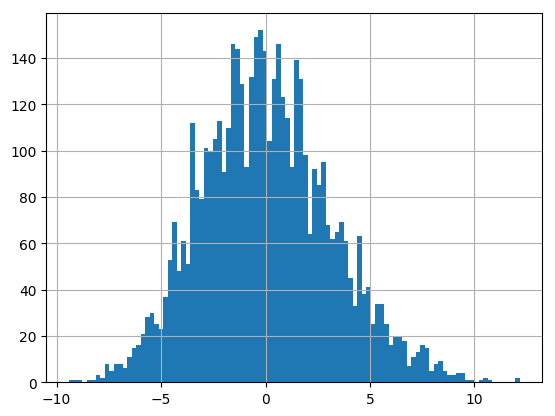

In [0]:
display(err.hist(bins=100))
# seems we get some really crazy predictions

In [0]:
predDf = pd.DataFrame(pred)
predDf.describe()

,0
count,4778.000000
mean,-0.698809
std,0.634628
min,-2.874609
25%,-1.148210
50%,-0.705539
75%,-0.322643
max,1.968967


In [0]:
Y_test.describe()

,RoundScore
count,4778.000000
mean,-0.649226
std,3.187009
min,-11.000000
25%,-3.000000
50%,-1.000000
75%,1.000000
max,12.000000


In [0]:
reg.score(pd.DataFrame(X_train), pd.DataFrame(Y_train))

Out[15]: 0.03744108139849245

In [0]:
#This shows the high variance I was worried about, Lets check accuracy
r2_score(Y_test["RoundScore"],pred)

Out[16]: 0.039920929581532594

In [0]:
import statistics as stats
def rmse(errors):
  return(pow(stats.mean([pow(e,2) for e in errors]),0.5))

In [0]:
rmse(err)

Out[18]: 3.1224197235019324

In [0]:
# seems we are way off, lets change the dependent variable to tournament score

In [0]:
tournamentScore = roundsDf.groupby(["PlayerID","TournamentID"]).agg({"RoundScore":"sum"})
tournamentScore.reset_index(inplace = True)
#since we doing this across all tournaments, we can drop tournament ID
tournamentScore.drop(["TournamentID"],inplace = True, axis = 1)

In [0]:
t_Reg = tournamentScore.merge(playerStats, how = "left", on = "PlayerID")

In [0]:
t_Reg.corr()
# our coorelation are still getting stronger, but still there is little that is very strongly coorelated

,PlayerID,RoundScore,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey
PlayerID,1.000000,0.004855,-0.061070,0.045633,0.086137,0.093445,0.088045,0.021411,-0.059723,-0.077536,-0.019827,0.163654,0.116833,-0.000587,-0.107320,0.081036,-0.085195,-0.008464,-0.062295,0.026793,0.088362,0.024766,0.046338,0.028828,-0.064198,-0.054416,-0.028555
RoundScore,0.004855,1.000000,-0.042304,-0.118401,-0.124288,-0.103413,-0.055999,-0.060877,-0.085252,-0.058009,-0.151672,-0.032963,-0.054973,-0.035960,0.013743,0.017717,0.035889,-0.011504,-0.043824,0.014363,0.049918,0.043077,0.215119,0.276761,0.242609,0.256324,-0.254891
GIR_PCT_FAIRWAY_BUNKER,-0.061070,-0.042304,1.000000,0.116777,0.192575,0.185959,0.035899,0.050131,0.015571,0.018287,0.052277,0.061419,0.083203,-0.114275,-0.059890,0.049524,0.089384,0.028376,-0.142657,0.204895,0.139202,0.000267,-0.154744,-0.092197,-0.117706,-0.091423,0.139576
GIR_PCT_FAIRWAY,0.045633,-0.118401,0.116777,1.000000,0.745509,0.626676,0.365441,0.372131,0.067156,0.011662,0.209705,0.367546,0.428718,-0.073430,-0.146690,0.090062,0.003107,0.062826,-0.318247,0.325126,0.319053,-0.123239,-0.282980,-0.323150,-0.273477,-0.292985,0.309895
GIR_PCT_OVERALL,0.086137,-0.124288,0.192575,0.745509,1.000000,0.924280,0.556700,0.474525,0.026629,0.032987,0.120675,0.100916,0.160161,0.353467,-0.115895,-0.186664,-0.271883,0.033121,-0.535297,0.551010,0.511568,-0.045562,-0.361824,-0.426772,-0.177826,-0.263187,0.401861
GIR_PCT_OVER_100,0.093445,-0.103413,0.185959,0.626676,0.924280,1.000000,0.609375,0.416912,0.063135,0.054120,0.050477,0.013739,0.055513,0.360062,-0.098923,-0.205998,-0.273881,0.023879,-0.500899,0.524968,0.479590,0.054190,-0.356536,-0.377600,-0.086341,-0.200788,0.343925
GIR_PCT_OVER_200,0.088045,-0.055999,0.035899,0.365441,0.556700,0.609375,1.000000,0.255239,0.043679,-0.096050,0.080388,0.192684,0.267620,0.146782,-0.038493,-0.005152,-0.228452,-0.106828,-0.274861,0.223795,0.274624,0.031799,-0.191654,-0.135724,-0.124704,-0.189054,0.116369
GIR_PCT_UNDER_100,0.021411,-0.060877,0.050131,0.372131,0.474525,0.416912,0.255239,1.000000,0.014356,-0.117416,-0.016865,-0.156422,-0.147722,0.259538,0.043245,-0.266854,-0.205528,0.027290,-0.292561,0.321187,0.229246,0.073337,-0.198510,-0.251748,-0.043664,-0.032256,0.229469
GREEN_PCT_SCRAMBLE_SAND,-0.059723,-0.085252,0.015571,0.067156,0.026629,0.063135,0.043679,0.014356,1.000000,0.100268,0.282215,0.047227,0.002776,0.036386,-0.030430,-0.003718,-0.046823,0.048835,0.337795,-0.335227,-0.378760,-0.045258,-0.270189,-0.220853,-0.216738,-0.259555,0.264138
GREEN_PCT_SCRAMBLE_ROUGH,-0.077536,-0.058009,0.018287,0.011662,0.032987,0.054120,-0.096050,-0.117416,0.100268,1.000000,0.255603,-0.192770,-0.109326,0.166508,0.051265,-0.108274,0.001578,0.052612,0.316465,-0.259354,-0.340677,0.168368,-0.180765,-0.155298,-0.083192,-0.141061,0.211982


In [0]:
X = t_Reg[["Par4Average","HolesPerBirdie","PUTTING_AVG_DIST_BIRDIE_INCH","PUTTING_AVG_PUTTS","TEE_AVG_DRIVING_DISTANCE","TEE_DRIVING_ACCURACY_PCT", "FINISHES_TOP10", "GIR_PCT_OVERALL", "GIR_PCT_FAIRWAY_BUNKER"]]
Y = t_Reg[["RoundScore"]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

reg = linear_model.LinearRegression()
reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))

Out[23]: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = reg.predict(X_test)
err = pd.Series(Y_test["RoundScore"]) - [p[0]for p in pred]

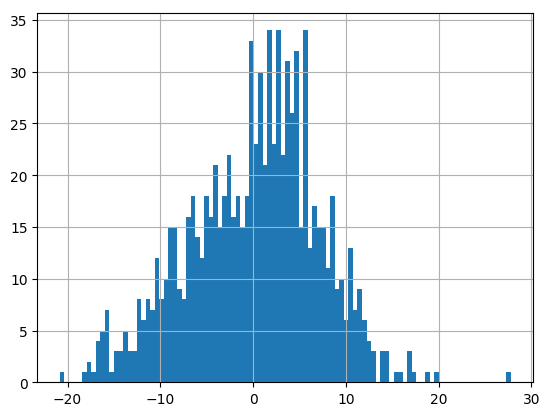

In [0]:
display(err.hist(bins=100))

In [0]:
predDf = pd.DataFrame(pred)
print(predDf.describe())
print(Y_test.describe())


0
count 911.000000
mean -2.183882
std 2.121583
min -7.275254
25% -3.571986
50% -1.954008
75% -0.981747
max 6.219377
 RoundScore
count 911.000000
mean -2.088913
std 7.255297
min -24.000000
25% -7.000000
50% -1.000000
75% 3.000000
max 24.000000

In [0]:
print ("R2 Train")
print(reg.score(pd.DataFrame(X_train), pd.DataFrame(Y_train)))
print("R2 Test")
print(r2_score(Y_test["RoundScore"],pred))
print("RMSE")
print(rmse(err))

R2 Train
0.0897685082600489
R2 Test
0.07117872333323672
RMSE
6.9884811290533495

In [0]:
def linearReg(ind,dep,split):
  X_train, X_test, Y_train, Y_test = train_test_split(ind,dep, test_size = split)
  
  
  reg = linear_model.LinearRegression()
  reg.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))
  
  pred = reg.predict(X_test)
  err = pd.Series(Y_test["RoundScore"]) - [p[0]for p in pred]
  
  
  print ("R2 Train")
  print(reg.score(pd.DataFrame(X_train), pd.DataFrame(Y_train)))
  print("R2 Test")
  print(r2_score(Y_test["RoundScore"],pred))
  print("RMSE")
  print(rmse(err))
  return(reg.coef_,reg.intercept_)
  
  

In [0]:
# to make this easier lets make a function
X = t_Reg[["Par4Average","HolesPerBirdie","PUTTING_AVG_PUTTS","TEE_AVG_DRIVING_DISTANCE", "FINISHES_TOP10", "GIR_PCT_OVERALL", "Par5Average", "Par3Average"]]
Y = t_Reg[["RoundScore"]]

c2, i2 = linearReg(X,Y,0.2)

R2 Train
0.09279102175651364
R2 Test
0.09581526879455549
RMSE
6.860710122593583

In [0]:
#we cant use different tournament in the dependant variable as is but its possible we can use the mean standardized version

tournamentScoreNorm = roundsDf.groupby(["PlayerID","TournamentID"]).agg({"RoundScore":"sum"})
tournamentScoreNorm.reset_index(inplace = True)
#pull the mean scores for each tournament
meanScores = tournamentScoreNorm.groupby("TournamentID").agg({"RoundScore":"mean"})
meanScores.reset_index(inplace=True)
meanScores.columns = ["TournamentID","Mean"]

tournamentScoreNorm = tournamentScoreNorm.merge(meanScores, how="left", on="TournamentID")

tournamentScoreNorm["NormScore"] = tournamentScoreNorm["RoundScore"] - tournamentScoreNorm["Mean"]
tournamentScoreNorm.drop(["TournamentID","Mean","RoundScore"], axis =1, inplace = True)
tournamentScoreNorm.columns = ["PlayerID","RoundScore"]

In [0]:
t_regNorm = tournamentScoreNorm.merge(playerStats, how ="left", on = "PlayerID")

In [0]:
t_regNorm.corr()

,PlayerID,RoundScore,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey
PlayerID,1.000000,0.017635,-0.061070,0.045633,0.086137,0.093445,0.088045,0.021411,-0.059723,-0.077536,-0.019827,0.163654,0.116833,-0.000587,-0.107320,0.081036,-0.085195,-0.008464,-0.062295,0.026793,0.088362,0.024766,0.046338,0.028828,-0.064198,-0.054416,-0.028555
RoundScore,0.017635,1.000000,-0.048988,-0.149113,-0.140566,-0.110670,-0.046433,-0.053609,-0.133207,-0.065597,-0.214902,-0.054062,-0.083194,-0.036359,0.002255,0.009243,0.035849,-0.009531,-0.079094,0.033643,0.090580,0.064852,0.275463,0.334746,0.301518,0.331610,-0.302901
GIR_PCT_FAIRWAY_BUNKER,-0.061070,-0.048988,1.000000,0.116777,0.192575,0.185959,0.035899,0.050131,0.015571,0.018287,0.052277,0.061419,0.083203,-0.114275,-0.059890,0.049524,0.089384,0.028376,-0.142657,0.204895,0.139202,0.000267,-0.154744,-0.092197,-0.117706,-0.091423,0.139576
GIR_PCT_FAIRWAY,0.045633,-0.149113,0.116777,1.000000,0.745509,0.626676,0.365441,0.372131,0.067156,0.011662,0.209705,0.367546,0.428718,-0.073430,-0.146690,0.090062,0.003107,0.062826,-0.318247,0.325126,0.319053,-0.123239,-0.282980,-0.323150,-0.273477,-0.292985,0.309895
GIR_PCT_OVERALL,0.086137,-0.140566,0.192575,0.745509,1.000000,0.924280,0.556700,0.474525,0.026629,0.032987,0.120675,0.100916,0.160161,0.353467,-0.115895,-0.186664,-0.271883,0.033121,-0.535297,0.551010,0.511568,-0.045562,-0.361824,-0.426772,-0.177826,-0.263187,0.401861
GIR_PCT_OVER_100,0.093445,-0.110670,0.185959,0.626676,0.924280,1.000000,0.609375,0.416912,0.063135,0.054120,0.050477,0.013739,0.055513,0.360062,-0.098923,-0.205998,-0.273881,0.023879,-0.500899,0.524968,0.479590,0.054190,-0.356536,-0.377600,-0.086341,-0.200788,0.343925
GIR_PCT_OVER_200,0.088045,-0.046433,0.035899,0.365441,0.556700,0.609375,1.000000,0.255239,0.043679,-0.096050,0.080388,0.192684,0.267620,0.146782,-0.038493,-0.005152,-0.228452,-0.106828,-0.274861,0.223795,0.274624,0.031799,-0.191654,-0.135724,-0.124704,-0.189054,0.116369
GIR_PCT_UNDER_100,0.021411,-0.053609,0.050131,0.372131,0.474525,0.416912,0.255239,1.000000,0.014356,-0.117416,-0.016865,-0.156422,-0.147722,0.259538,0.043245,-0.266854,-0.205528,0.027290,-0.292561,0.321187,0.229246,0.073337,-0.198510,-0.251748,-0.043664,-0.032256,0.229469
GREEN_PCT_SCRAMBLE_SAND,-0.059723,-0.133207,0.015571,0.067156,0.026629,0.063135,0.043679,0.014356,1.000000,0.100268,0.282215,0.047227,0.002776,0.036386,-0.030430,-0.003718,-0.046823,0.048835,0.337795,-0.335227,-0.378760,-0.045258,-0.270189,-0.220853,-0.216738,-0.259555,0.264138
GREEN_PCT_SCRAMBLE_ROUGH,-0.077536,-0.065597,0.018287,0.011662,0.032987,0.054120,-0.096050,-0.117416,0.100268,1.000000,0.255603,-0.192770,-0.109326,0.166508,0.051265,-0.108274,0.001578,0.052612,0.316465,-0.259354,-0.340677,0.168368,-0.180765,-0.155298,-0.083192,-0.141061,0.211982


In [0]:
X = t_regNorm[["Par4Average","HolesPerBirdie","PUTTING_AVG_DIST_BIRDIE_INCH", "PUTTING_AVG_ONE_PUTTS", "TEE_AVG_DRIVING_DISTANCE", "TEE_AVG_LEFT_ROUGH_TENDENCY_PCT", "FINISHES_TOP10", "GREEN_PCT_SCRAMBLE_SAND", "Par5Average", "Par3Average"]]
Y = t_regNorm[["RoundScore"]]

c1, i1 = linearReg(X,Y,0.2)
#normalizing improves our R2 value

R2 Train
0.1494199905240151
R2 Test
0.13203855545146304
RMSE
5.309117270231728

In [0]:
# again our scores are pretty bad, but maybe they'll get better if we look at just one tournament
tournamentScore2 = roundsDf.groupby(["PlayerID","TournamentID"]).agg({"RoundScore":"sum"})
tournamentScore2.reset_index(inplace = True)


In [0]:
#lets pick the tournament where we have the most players
roundsDf.groupby("TournamentID").agg({"PlayerID":"nunique"}).sort_values("PlayerID", ascending = False).head(2)
# Tournament 429, the players championship

,PlayerID
TournamentID,
429,139
414,131


In [0]:
tournamentScore2 =tournamentScore2.loc[tournamentScore2["TournamentID"] == 429]
tournamentScore2.drop(["TournamentID"], axis = 1, inplace = True)

In [0]:
t2_reg = tournamentScore2.merge(playerStats, how = "left", on = "PlayerID")

In [0]:
t2_reg.corr()
#now we have some much stronger coorelations, lets try to use them

,PlayerID,RoundScore,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey
PlayerID,1.000000,0.037414,-0.034580,0.010575,0.128726,0.166309,0.086948,0.029048,0.000361,-0.051969,-0.043499,0.077206,0.050202,0.064812,-0.029489,-0.012256,-0.076676,-0.044956,-0.055531,0.014691,0.112154,-0.004862,-0.014531,0.020036,0.002252,-0.047373,-0.002971
RoundScore,0.037414,1.000000,-0.046605,-0.057396,-0.096779,-0.094406,-0.119871,0.036433,-0.286413,-0.105599,-0.248876,-0.147107,-0.197808,0.041580,0.010814,-0.137518,0.070697,-0.043578,-0.128725,0.079927,0.111447,0.178392,0.319090,0.313097,0.406398,0.378213,-0.322831
GIR_PCT_FAIRWAY_BUNKER,-0.034580,-0.046605,1.000000,0.010643,0.084308,0.069766,-0.060282,0.030794,0.004907,-0.015272,-0.017128,0.088863,0.089231,-0.144551,-0.083518,0.062056,0.125431,0.002730,-0.172196,0.215430,0.181034,-0.094508,-0.106933,-0.036437,-0.072865,-0.032415,0.067947
GIR_PCT_FAIRWAY,0.010575,-0.057396,0.010643,1.000000,0.709098,0.559902,0.320659,0.312207,0.075356,0.019210,0.204741,0.420591,0.504037,-0.182359,-0.099430,0.203883,0.052690,-0.018888,-0.271278,0.255891,0.325270,-0.205497,-0.282179,-0.310248,-0.302126,-0.300079,0.321164
GIR_PCT_OVERALL,0.128726,-0.096779,0.084308,0.709098,1.000000,0.903632,0.551833,0.424192,0.042941,0.031653,0.105886,0.167756,0.268833,0.281611,-0.071641,-0.115219,-0.234313,-0.047495,-0.532791,0.527076,0.559060,-0.190551,-0.363099,-0.436330,-0.183439,-0.257315,0.422768
GIR_PCT_OVER_100,0.166309,-0.094406,0.069766,0.559902,0.903632,1.000000,0.589560,0.366649,0.070244,0.050085,0.045273,0.030092,0.110629,0.335355,-0.055937,-0.175331,-0.272869,-0.049817,-0.497431,0.517534,0.527543,-0.067086,-0.378588,-0.398120,-0.094180,-0.195700,0.371911
GIR_PCT_OVER_200,0.086948,-0.119871,-0.060282,0.320659,0.551833,0.589560,1.000000,0.215023,0.023369,-0.079310,0.086677,0.207670,0.305906,0.138739,0.022343,-0.002102,-0.207574,-0.148240,-0.252105,0.199551,0.283087,0.014959,-0.230130,-0.232867,-0.175112,-0.254991,0.168624
GIR_PCT_UNDER_100,0.029048,0.036433,0.030794,0.312207,0.424192,0.366649,0.215023,1.000000,0.035716,-0.181008,-0.076459,-0.186499,-0.132696,0.215055,0.089521,-0.259751,-0.155393,-0.082345,-0.262850,0.278971,0.225588,-0.025670,-0.197560,-0.247562,-0.018876,0.010205,0.224550
GREEN_PCT_SCRAMBLE_SAND,0.000361,-0.286413,0.004907,0.075356,0.042941,0.070244,0.023369,0.035716,1.000000,0.025814,0.303772,0.048363,0.003653,0.041706,-0.038475,0.002584,-0.072106,0.026373,0.383259,-0.386020,-0.359621,-0.036062,-0.239743,-0.255865,-0.255476,-0.275704,0.270953
GREEN_PCT_SCRAMBLE_ROUGH,-0.051969,-0.105599,-0.015272,0.019210,0.031653,0.050085,-0.079310,-0.181008,0.025814,1.000000,0.247642,-0.099845,-0.002809,0.106851,0.038023,-0.063197,0.017866,0.048355,0.347055,-0.293935,-0.346060,0.089644,-0.222248,-0.110598,-0.108904,-0.146532,0.169881


In [0]:
X = t2_reg[["Par4Average","HolesPerBirdie","PUTTING_AVG_DIST_BIRDIE_INCH", "PUTTING_AVG_ONE_PUTTS", "TEE_AVG_DRIVING_DISTANCE", "TEE_AVG_LEFT_ROUGH_TENDENCY_PCT", "FINISHES_TOP10", "GREEN_PCT_SCRAMBLE_SAND", "Par5Average", "Par3Average"]]
Y = t2_reg[["RoundScore"]]

c3,i3 = linearReg(X,Y,0.2)

#now our R2 is much higher, but can we still do better?

R2 Train
0.21528611242331008
R2 Test
0.3075132313025529
RMSE
4.406874642126413

In [0]:
#mean standardize for one tournament
mean429 = meanScores.loc[meanScores["TournamentID"]==429]
mean429 = mean429["Mean"][22]
mean429

Out[40]: 1.064748201438849

In [0]:
Y = t2_reg[["RoundScore"]]
Y["RoundScoreNorm"] = Y["RoundScore"] - mean429
Y = Y[["RoundScoreNorm"]]
Y.columns = ["RoundScore"]

/local_disk0/tmp/1638734934768-0/PythonShell.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import print_function

In [0]:
c4,i4 = linearReg(X,Y,0.2)
#our result is about the same

R2 Train
0.1837246997471631
R2 Test
0.33464434502699003
RMSE
5.121253130249388

In [0]:
# lets just play w the ivs for a bit
X = t2_reg[["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey","GREEN_PCT_SCRAMBLE_SAND"]]
Y = t2_reg[["RoundScore"]]

c5,i5 = linearReg(X,Y,0.2)

R2 Train
0.2563711671139596
R2 Test
0.06018519654244103
RMSE
7.231706373992696

In [0]:
# lets just play w the ivs for a bit
X = t2_reg[["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey","GIR_PCT_OVERALL"]]
Y = t2_reg[["RoundScore"]]

c5,i5 = linearReg(X,Y,0.2)

R2 Train
0.16311008087683654
R2 Test
0.3609872190235913
RMSE
4.575300432565725

Since our most accurate model is specfic tournament results, lets add the 3 Strokes Gained categories

In [0]:
StrokesGained = pd.read_csv("/dbfs/FileStore/karbide/StrokesGainedIDs.txt")
StrokesGained.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [0]:
t2_regSG = t2_reg.merge(StrokesGained, how = "inner", on = "PlayerID")

In [0]:
t2_regSG.columns

Out[47]: Index(['PlayerID', 'RoundScore', 'PLAYER NAME_x', 'GIR_PCT_FAIRWAY_BUNKER',
 'GIR_PCT_FAIRWAY', 'GIR_PCT_OVERALL', 'GIR_PCT_OVER_100',
 'GIR_PCT_OVER_200', 'GIR_PCT_UNDER_100', 'GREEN_PCT_SCRAMBLE_SAND',
 'GREEN_PCT_SCRAMBLE_ROUGH', 'FINISHES_TOP10', 'TEE_AVG_BALL_SPEED',
 'TEE_AVG_DRIVING_DISTANCE', 'TEE_DRIVING_ACCURACY_PCT',
 'TEE_AVG_LAUNCH_ANGLE', 'TEE_AVG_LEFT_ROUGH_TENDENCY_PCT',
 'TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT', 'TEE_AVG_SPIN_RATE',
 'PUTTING_AVG_ONE_PUTTS', 'PUTTING_AVG_TWO_PUTTS',
 'PUTTING_AVG_DIST_BIRDIE', 'PUTTING_AVG_PUTTS',
 'PUTTING_AVG_DIST_BIRDIE_INCH', 'Par3Average', 'Par4Average',
 'Par5Average', 'HolesPerBirdie', 'HolesPerBogey', 'PLAYER NAME_y',
 'AVERAGE', 'TOTAL SG:T', 'TOTAL SG:T2G', 'TOTAL SG:P'],
 dtype='object')

In [0]:
# now with SG
X = t2_regSG[["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey","GREEN_PCT_SCRAMBLE_SAND", 'TOTAL SG:T', "TOTAL SG:T2G", 'TOTAL SG:P']]
Y = t2_regSG[["RoundScore"]]

c6,i6 = linearReg(X,Y,0.2)

R2 Train
0.3548836678184868
R2 Test
-0.13999032223625085
RMSE
6.174526639873034

In [0]:
X = t2_regSG[["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey","GREEN_PCT_SCRAMBLE_SAND", 'TOTAL SG:T', "TOTAL SG:T2G", 'TOTAL SG:P']]
Y = t2_regSG[["RoundScore"]]

c7,i7 = linearReg(X,Y,0.2)

R2 Train
0.3414480347004021
R2 Test
-0.0492530340163122
RMSE
6.490421115349977

In [0]:
X = t2_regSG[["GREEN_PCT_SCRAMBLE_SAND", 'TOTAL SG:T', "Par4Average","HolesPerBirdie"]]
Y = t2_regSG[["RoundScore"]]

c8,i8 = linearReg(X,Y,0.2)
print(c8,i8)

R2 Train
0.2296051586910397
R2 Test
0.42024850670283287
RMSE
3.9478718834686637
[[ -0.15593186 -0.05446459 -13.96832246 0.86606854]] [6.5605415]

# MODEL RESULTS AND COEFFICIENTS
**Tournament 429**

*Model 1*:

IVs -> ["Par4Average","HolesPerBirdie","PUTTING_AVG_DIST_BIRDIE_INCH", "PUTTING_AVG_ONE_PUTTS", "TEE_AVG_DRIVING_DISTANCE", "TEE_AVG_LEFT_ROUGH_TENDENCY_PCT", "FINISHES_TOP10", "GREEN_PCT_SCRAMBLE_SAND", "Par5Average", "Par3Average"]

DV -> Tournament Score

R2 and RMSE = 0.3229964494135511, 4.795109852419135

coef, int = [[ 2.32846057e+01 -2.26333978e-01  6.19652183e-02  1.83444680e-01 -2.53906041e-02 -2.46384591e-01 -1.97731802e-02 -1.40051312e-01 1.61535095e+01  1.39734513e+01]], 16.67094541

*Model 2*

IVs -> ["Par4Average","HolesPerBirdie","PUTTING_AVG_DIST_BIRDIE_INCH", "PUTTING_AVG_ONE_PUTTS", "TEE_AVG_DRIVING_DISTANCE", "TEE_AVG_LEFT_ROUGH_TENDENCY_PCT", "FINISHES_TOP10", "GREEN_PCT_SCRAMBLE_SAND", "Par5Average", "Par3Average"]

DV -> Tournament Score/Mean Standardized

R2 and RMSE = 0.27481894608420776, 5.278633537736203

coef, int =[[ 6.31478232e+00 -8.16209567e-02  7.18796229e-02 -4.30983221e-01 -8.41258947e-03 -2.12066433e-01  7.78575502e-02 -1.20083842e-01 2.55502279e+01  7.95291971e+00]], 15.26182535

*Model 3*

IVs -> ["Par4Average","HolesPerBirdie", "HolesPerBogey", "GREEN_PCT_SCRAMBLE_SAND", "Par5Average", "Par3Average"]

DV -> Tournament Score

R2 and RMSE = 0.3787100076428008, 4.605715520235553

coef, int = [[ 6.81122888  1.61102777 20.98822676 19.81415731  0.39739065 -0.09967628]], 2.13676949

*Model 4*

IVs -> [["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey","GREEN_PCT_SCRAMBLE_SAND", 'TOTAL SG:T', "TOTAL SG:T2G", 'TOTAL SG:P']]

DV -> Tournament Score

R2 and RMSE = 0.5044001176837463,3.52737074470192

coef, int = [[-1.46756830e+01  7.27174253e-01  4.24465311e+00 -2.42897881e+00 6.32162133e-02 -1.04608027e-01 -6.62482431e+02  6.62435768e+02 6.62423818e+02]] [4.27898458]

In [0]:
print(c6)
print(i6)

[[-4.88017616e+00 9.51356265e-01 6.23563884e+00 5.40286634e+00
 6.43557940e-01 -5.44418205e-02 -4.67310051e+02 4.67255281e+02
 4.67220504e+02]]
[-2.56976935]

In [0]:
#Lets try some feature importance to increase our model accuracy
t2_regSG.corr(method = 'pearson')

,PlayerID,RoundScore,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey,AVERAGE,TOTAL SG:T,TOTAL SG:T2G,TOTAL SG:P
PlayerID,1.000000,-0.001750,-0.004230,-0.008138,0.118113,0.156940,0.076559,0.018441,0.005208,-0.054857,-0.009799,0.025483,0.010595,0.087375,-0.026209,-0.009023,-0.122757,-0.080150,-0.044528,0.017676,0.092638,-0.014556,-0.058821,-0.016396,-0.002309,-0.057740,0.045848,-0.071854,-0.046382,0.003390,-0.092927
RoundScore,-0.001750,1.000000,-0.035633,-0.080035,-0.108092,-0.095891,-0.118622,0.009627,-0.291594,-0.088825,-0.229633,-0.175955,-0.216662,0.068271,-0.000271,-0.151803,0.048039,-0.052503,-0.096783,0.057280,0.079307,0.212461,0.329674,0.324502,0.412605,0.404894,-0.324982,-0.472585,-0.489348,-0.381708,-0.260012
GIR_PCT_FAIRWAY_BUNKER,-0.004230,-0.035633,1.000000,-0.009798,0.071661,0.051135,-0.079316,0.006460,0.000121,-0.037971,-0.048688,0.106941,0.098053,-0.148382,-0.100578,0.063060,0.136621,0.017013,-0.188925,0.223730,0.203944,-0.117011,-0.076023,-0.011881,-0.067459,-0.013520,0.040728,0.039661,0.034572,0.141533,-0.179331
GIR_PCT_FAIRWAY,-0.008138,-0.080035,-0.009798,1.000000,0.708804,0.566061,0.307666,0.295987,0.045731,0.015215,0.206662,0.414441,0.497750,-0.166522,-0.130761,0.222166,0.023443,-0.020538,-0.283184,0.282629,0.334093,-0.199530,-0.269507,-0.298482,-0.297258,-0.281114,0.317625,0.420157,0.411368,0.475353,-0.047991
GIR_PCT_OVERALL,0.118113,-0.108092,0.071661,0.708804,1.000000,0.904297,0.544406,0.421291,0.025073,0.015669,0.104112,0.155740,0.255258,0.297325,-0.089009,-0.107915,-0.250065,-0.046069,-0.553953,0.555240,0.574676,-0.189073,-0.362700,-0.425808,-0.176011,-0.230688,0.429375,0.383409,0.374033,0.527174,-0.207506
GIR_PCT_OVER_100,0.156940,-0.095891,0.051135,0.566061,0.904297,1.000000,0.582787,0.368249,0.058615,0.025596,0.035542,0.012821,0.090791,0.347014,-0.065062,-0.169493,-0.283130,-0.051639,-0.527912,0.550991,0.553115,-0.078574,-0.389961,-0.390915,-0.084023,-0.163993,0.386792,0.320234,0.322453,0.433323,-0.142382
GIR_PCT_OVER_200,0.076559,-0.118622,-0.079316,0.307666,0.544406,0.582787,1.000000,0.220240,-0.002446,-0.102545,0.072402,0.187031,0.283993,0.149214,0.012291,0.011894,-0.230374,-0.157951,-0.281638,0.231157,0.305762,0.005137,-0.231923,-0.219283,-0.156795,-0.225011,0.169476,0.168802,0.158334,0.224673,-0.090451
GIR_PCT_UNDER_100,0.018441,0.009627,0.006460,0.295987,0.421291,0.368249,0.220240,1.000000,0.038538,-0.183076,-0.072673,-0.193196,-0.134677,0.238627,0.077793,-0.272704,-0.172679,-0.078923,-0.245153,0.271655,0.210822,-0.008211,-0.185321,-0.257956,-0.033286,0.006104,0.224475,0.120151,0.114255,0.163447,-0.067543
GREEN_PCT_SCRAMBLE_SAND,0.005208,-0.291594,0.000121,0.045731,0.025073,0.058615,-0.002446,0.038538,1.000000,0.027555,0.290238,0.019805,-0.034154,0.056091,-0.060613,0.023936,-0.095154,0.022351,0.380248,-0.370381,-0.357835,-0.036075,-0.234289,-0.224055,-0.231281,-0.229699,0.265471,0.357041,0.359943,0.253327,0.238616
GREEN_PCT_SCRAMBLE_ROUGH,-0.054857,-0.088825,-0.037971,0.015215,0.015669,0.025596,-0.102545,-0.183076,0.027555,1.000000,0.246797,-0.106914,-0.015198,0.092231,0.044088,-0.054332,0.030483,0.057625,0.336660,-0.291453,-0.340251,0.093095,-0.225160,-0.102348,-0.107397,-0.142532,0.169389,0.213084,0.192275,0.047600,0.278835


In [0]:
t2_regSG2 = t2_regSG.drop(["PlayerID"], axis = 1)
t2_regSG2.corr(method = 'pearson')

,RoundScore,GIR_PCT_FAIRWAY_BUNKER,GIR_PCT_FAIRWAY,GIR_PCT_OVERALL,GIR_PCT_OVER_100,GIR_PCT_OVER_200,GIR_PCT_UNDER_100,GREEN_PCT_SCRAMBLE_SAND,GREEN_PCT_SCRAMBLE_ROUGH,FINISHES_TOP10,TEE_AVG_BALL_SPEED,TEE_AVG_DRIVING_DISTANCE,TEE_DRIVING_ACCURACY_PCT,TEE_AVG_LAUNCH_ANGLE,TEE_AVG_LEFT_ROUGH_TENDENCY_PCT,TEE_AVG_RIGHT_ROUGH_TENDENCY_PCT,TEE_AVG_SPIN_RATE,PUTTING_AVG_ONE_PUTTS,PUTTING_AVG_TWO_PUTTS,PUTTING_AVG_PUTTS,PUTTING_AVG_DIST_BIRDIE_INCH,Par3Average,Par4Average,Par5Average,HolesPerBirdie,HolesPerBogey,AVERAGE,TOTAL SG:T,TOTAL SG:T2G,TOTAL SG:P
RoundScore,1.000000,-0.035633,-0.080035,-0.108092,-0.095891,-0.118622,0.009627,-0.291594,-0.088825,-0.229633,-0.175955,-0.216662,0.068271,-0.000271,-0.151803,0.048039,-0.052503,-0.096783,0.057280,0.079307,0.212461,0.329674,0.324502,0.412605,0.404894,-0.324982,-0.472585,-0.489348,-0.381708,-0.260012
GIR_PCT_FAIRWAY_BUNKER,-0.035633,1.000000,-0.009798,0.071661,0.051135,-0.079316,0.006460,0.000121,-0.037971,-0.048688,0.106941,0.098053,-0.148382,-0.100578,0.063060,0.136621,0.017013,-0.188925,0.223730,0.203944,-0.117011,-0.076023,-0.011881,-0.067459,-0.013520,0.040728,0.039661,0.034572,0.141533,-0.179331
GIR_PCT_FAIRWAY,-0.080035,-0.009798,1.000000,0.708804,0.566061,0.307666,0.295987,0.045731,0.015215,0.206662,0.414441,0.497750,-0.166522,-0.130761,0.222166,0.023443,-0.020538,-0.283184,0.282629,0.334093,-0.199530,-0.269507,-0.298482,-0.297258,-0.281114,0.317625,0.420157,0.411368,0.475353,-0.047991
GIR_PCT_OVERALL,-0.108092,0.071661,0.708804,1.000000,0.904297,0.544406,0.421291,0.025073,0.015669,0.104112,0.155740,0.255258,0.297325,-0.089009,-0.107915,-0.250065,-0.046069,-0.553953,0.555240,0.574676,-0.189073,-0.362700,-0.425808,-0.176011,-0.230688,0.429375,0.383409,0.374033,0.527174,-0.207506
GIR_PCT_OVER_100,-0.095891,0.051135,0.566061,0.904297,1.000000,0.582787,0.368249,0.058615,0.025596,0.035542,0.012821,0.090791,0.347014,-0.065062,-0.169493,-0.283130,-0.051639,-0.527912,0.550991,0.553115,-0.078574,-0.389961,-0.390915,-0.084023,-0.163993,0.386792,0.320234,0.322453,0.433323,-0.142382
GIR_PCT_OVER_200,-0.118622,-0.079316,0.307666,0.544406,0.582787,1.000000,0.220240,-0.002446,-0.102545,0.072402,0.187031,0.283993,0.149214,0.012291,0.011894,-0.230374,-0.157951,-0.281638,0.231157,0.305762,0.005137,-0.231923,-0.219283,-0.156795,-0.225011,0.169476,0.168802,0.158334,0.224673,-0.090451
GIR_PCT_UNDER_100,0.009627,0.006460,0.295987,0.421291,0.368249,0.220240,1.000000,0.038538,-0.183076,-0.072673,-0.193196,-0.134677,0.238627,0.077793,-0.272704,-0.172679,-0.078923,-0.245153,0.271655,0.210822,-0.008211,-0.185321,-0.257956,-0.033286,0.006104,0.224475,0.120151,0.114255,0.163447,-0.067543
GREEN_PCT_SCRAMBLE_SAND,-0.291594,0.000121,0.045731,0.025073,0.058615,-0.002446,0.038538,1.000000,0.027555,0.290238,0.019805,-0.034154,0.056091,-0.060613,0.023936,-0.095154,0.022351,0.380248,-0.370381,-0.357835,-0.036075,-0.234289,-0.224055,-0.231281,-0.229699,0.265471,0.357041,0.359943,0.253327,0.238616
GREEN_PCT_SCRAMBLE_ROUGH,-0.088825,-0.037971,0.015215,0.015669,0.025596,-0.102545,-0.183076,0.027555,1.000000,0.246797,-0.106914,-0.015198,0.092231,0.044088,-0.054332,0.030483,0.057625,0.336660,-0.291453,-0.340251,0.093095,-0.225160,-0.102348,-0.107397,-0.142532,0.169389,0.213084,0.192275,0.047600,0.278835
FINISHES_TOP10,-0.229633,-0.048688,0.206662,0.104112,0.035542,0.072402,-0.072673,0.290238,0.246797,1.000000,0.241669,0.300837,-0.044737,0.007934,0.087628,0.072942,0.041708,0.460824,-0.425097,-0.464760,-0.049934,-0.306517,-0.297551,-0.417286,-0.424995,0.323492,0.480931,0.465478,0.389196,0.202271


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
X = t2_regSG[["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey","GREEN_PCT_SCRAMBLE_SAND", 'TOTAL SG:T', "TOTAL SG:T2G", 'TOTAL SG:P','AVERAGE']]
Y = t2_regSG[["RoundScore"]]

scaler = MinMaxScaler()
scaler.fit(X)
sX = scaler.transform(X)
cols = X.columns
X_new = pd.DataFrame(sX,columns = cols)

c7,i7 = linearReg(X,Y,0.2)
print(c7,i7)
#coefficients sugguest we remove some of the variables

R2 Train
0.26599250088144955
R2 Test
0.3255839060727722
RMSE
5.262384485582393
[[-1.31247769e+01 5.75677907e-01 6.13386190e+00 -1.52868136e+00
 4.42338707e-01 -1.52709241e-01 -5.20046463e+02 5.19912513e+02
 5.19897106e+02 5.99678744e+00]] [5.93471407]

In [0]:
X = t2_regSG[["Par4Average","HolesPerBirdie", "Par5Average", "Par3Average", "HolesPerBogey",'AVERAGE']]
Y = t2_regSG[["RoundScore"]]

scaler = MinMaxScaler()
scaler.fit(X)
sX = scaler.transform(X)
cols = X.columns
X_new = pd.DataFrame(sX,columns = cols)

c8,i8 = linearReg(X,Y,0.2)
print(c8,i8)

R2 Train
0.1496051113950203
R2 Test
0.33735587232586073
RMSE
5.723276156671251
[[-20.29962211 -0.09889105 16.19167533 5.0063921 0.49802231
 -2.87641114]] [4.91897889]

In [0]:
X = t2_regSG[["Par4Average", "Par5Average", "Par3Average",'AVERAGE']]
Y = t2_regSG[["RoundScore"]]

scaler = MinMaxScaler()
scaler.fit(X)
sX = scaler.transform(X)
cols = X.columns
X_new = pd.DataFrame(sX,columns = cols)

c8,i8 = linearReg(X,Y,0.2)
print(c8,i8)

R2 Train
0.1684261008753246
R2 Test
0.43257146052482587
RMSE
4.9588432900396295
[[-15.14492738 10.44594273 5.67832195 -3.32189072]] [6.07691841]

In [0]:
X = t2_regSG[['TOTAL SG:T', "TOTAL SG:T2G", 'TOTAL SG:P']]
Y = t2_regSG[["RoundScore"]]

scaler = MinMaxScaler()
scaler.fit(X)
sX = scaler.transform(X)
cols = X.columns
X_new = pd.DataFrame(sX,columns = cols)

c9,i9 = linearReg(X,Y,0.2)
print(c9,i9)

R2 Train
0.25955242108773824
R2 Test
0.2010544226066392
RMSE
6.513716569171031
[[-669.76218364 669.7110841 669.71271764]] [0.9745816]